In [27]:
%load_ext autoreload
%autoreload 2

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from histogram_filters import convolve
from kalman import plot_gaussian

# Kalman filter


- Parametric filter: mean, variance
- Unimodal
- Google uses it to locate other cars

# The model (Moving object)
## Definition

$S_k = S_{k-1} + 1 + W$

$X_k = S_k + V$

Similar to the [additive noise histogram filter](https://github.com/jganzabal/Kalman-as-Recursive-Bayesian-Estimation/blob/master/Additive%20noise%20Histogram%20Filters.ipynb)  but with some fundamental differences:
- $S_k$ is a continuos process. No more discrete states
- $W_n$ is Gaussian
- $V$ is Gaussian

Instead of having probabilities, we have densities. We use lowercase p is density, uppercase P for probability

**Moving noise** (W):

$p(W) = \frac{1}{\sigma_w \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(W-\mu_w)}{\sigma_w^2}^2}$

$\mu_w = 0$

**Measurement error**:

$p(V) = \frac{1}{\sigma_v \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(V-\mu_v)}{\sigma_v^2}^2}$

$\mu_v = 0$

## The observation  - $X_k = S_k + V$
This is the density before observing given than we are on a specific state

V is gaussian with mean 0, so $X_k$ given $S_k$ will be gaussian with mean $S_k$. 

$p(X|S_k) = \frac{1}{\sigma_v \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(X-S_k)}{\sigma_v^2}^2}$


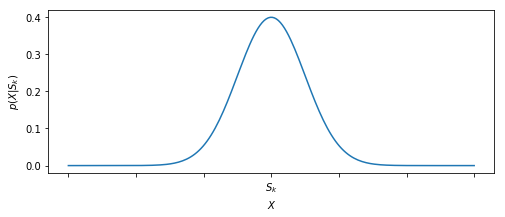

In [46]:
_ =plot_gaussian(N = 6, y_label = "$p(X|S_k)$", x_label = "$X$", center_label_tick = "$S_k$",figsize=(8,3))

## The likelihood -  $\mathcal{L}(S_k|X=X_0)$ = $p(X=X_0|S_k)$ 

Remember that for the likelihood, the observation $X_0$ is fixed and $S_k$ varies

$p(X=X_0|S_k) = \frac{1}{\sigma_v \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(X_0-S_k)}{\sigma_v^2}^2}$

This is equivalent to a Gaussian pdf that depends on $S_k$ with mean $X_0$ and variance $\sigma_v$

So given the observation $X_0$ the likelihood is:

$p(S_k| \mu=X_0) = \frac{1}{\sigma_v \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(S_k-X_0)}{\sigma_v^2}^2}$

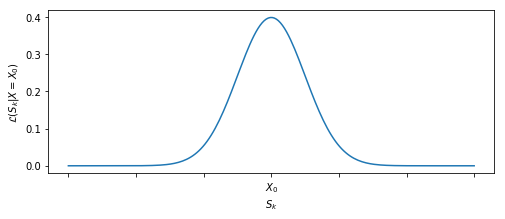

In [55]:
_ =plot_gaussian(N = 6, y_label = "$\mathcal{L}(S_k|X=X_0)$", x_label = "$S_k$", center_label_tick = "$X_0$",figsize=(8,3))

## Prior (belief): my belief before measuring

$p(S) = \frac{1}{\sigma_s \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(S-\mu_s)}{\sigma_s^2}^2}$

$\sigma_s^2$ is the initial uncertainty

## Posterior: probability of a state given the measurements

$p(S_k|X) = \alpha p(X|S_k)p(S_K)$

**Bayes**:

$p(S_k|X) = \frac{p(X|S_k)p(S_K)}{p(X)}$

$p(X) = \sum_i{p(X,S_i)} = \sum_i{p(X|S_i)p(S_i)}$

Because likelihood and prior are gaussians, the posterior is gaussian

# The filter
## The goal. Where am I?
Find my position $S_k$ given the observations
## Update - Bayes
Given the prior and the likelihood, find the posterior $S_k$

$X_k = S_k + V$

## Predict - Sum of random variable
With the posterior predict $S_k$ adding 1 + W

$S_k = S_{k-1} + 1 + W$

## Loop
My prediction is my prior, so observe X again and update, and so on ...

# Properties of the gaussians - Parametric model

https://github.com/jganzabal/Kalman-as-Recursive-Bayesian-Estimation/blob/master/gaussians_convolutions_lecture3.pdf

## Update - Product of Gaussians
Parallel resistances analogy

$\sigma_x^2 = \frac{\sigma_u^2\mu_v +\mu_u \sigma_v^2}{\sigma_u^2 + \sigma_v^2}$

$\sigma_x^2 = \frac{\sigma_u^2 \sigma_v^2}{\sigma_u^2 + \sigma_v^2}$

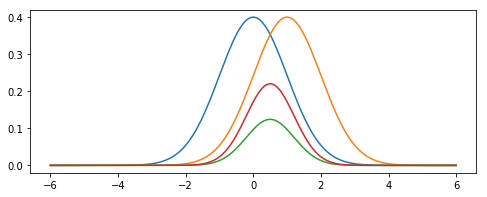

In [68]:
sig_u = 1
sig_v = 1
mu_u = 0
mu_v = 1
f, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize = (8,3))
x, prior =plot_gaussian(mu = mu_u, sig = sig_u, N = 6, ax = ax)
_, likelihood =plot_gaussian(mu = mu_v, sig = sig_v, N = 6, ax = ax, x=x)
posterior_unnormalized = prior*likelihood
ax.plot(x, posterior_unnormalized)

sig_x = sig_u*sig_v/(sig_u+sig_v)
u_x = (sig_u*mu_v + sig_v*mu_u)/(sig_u+sig_v)

alpha = (np.sqrt(2*np.pi*sig_x))
posterior = posterior_unnormalized*alpha
ax.plot(x, posterior)

#posterior = plot_gaussian(mu = u_x, sig = sig_x, N = 6, ax = ax)

## Predict - Convolution of Gaussians